# About Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv


In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv")

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


# Data Preprocessing and Analysis

In [4]:
# Data Modification

df.Revenue = df.Revenue.astype(int)
df.Weekend = df.Weekend.astype(int)
df.VisitorType = df.VisitorType.replace(
    {'Returning_Visitor': '-1', 
    'Other': '0',
    'New_Visitor': '1', 
    }).astype(int)
df.Month = df.Month.replace(
    {'Jan': '1',
    'Feb': '2', 
    'Mar': '3', 
    'Apr': '4',
    'May': '5', 
    'June': '6', 
    'Jul': '7', 
    'Aug': '8', 
    'Sep': '9', 
    'Oct': '10', 
    'Nov': '11', 
    'Dec': '12',
    }).astype(int)

<Axes: >

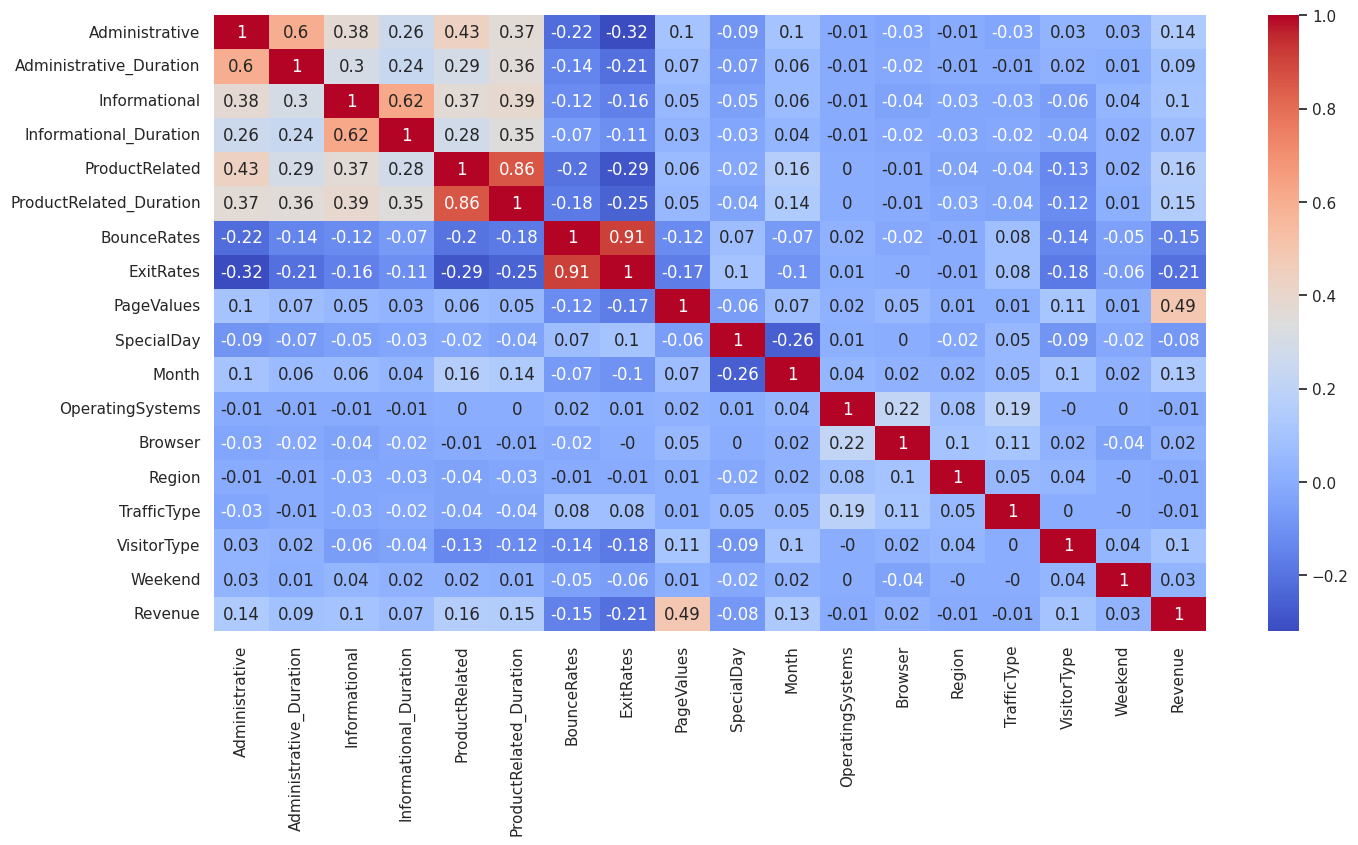

In [5]:
# Correlation Matrix

import seaborn as sns
sns.set(rc={'figure.figsize': (16, 8)})
sns.heatmap(df.corr().round(decimals=2,), annot=True, cmap='coolwarm',)

## Bounce Rates Compared to Features

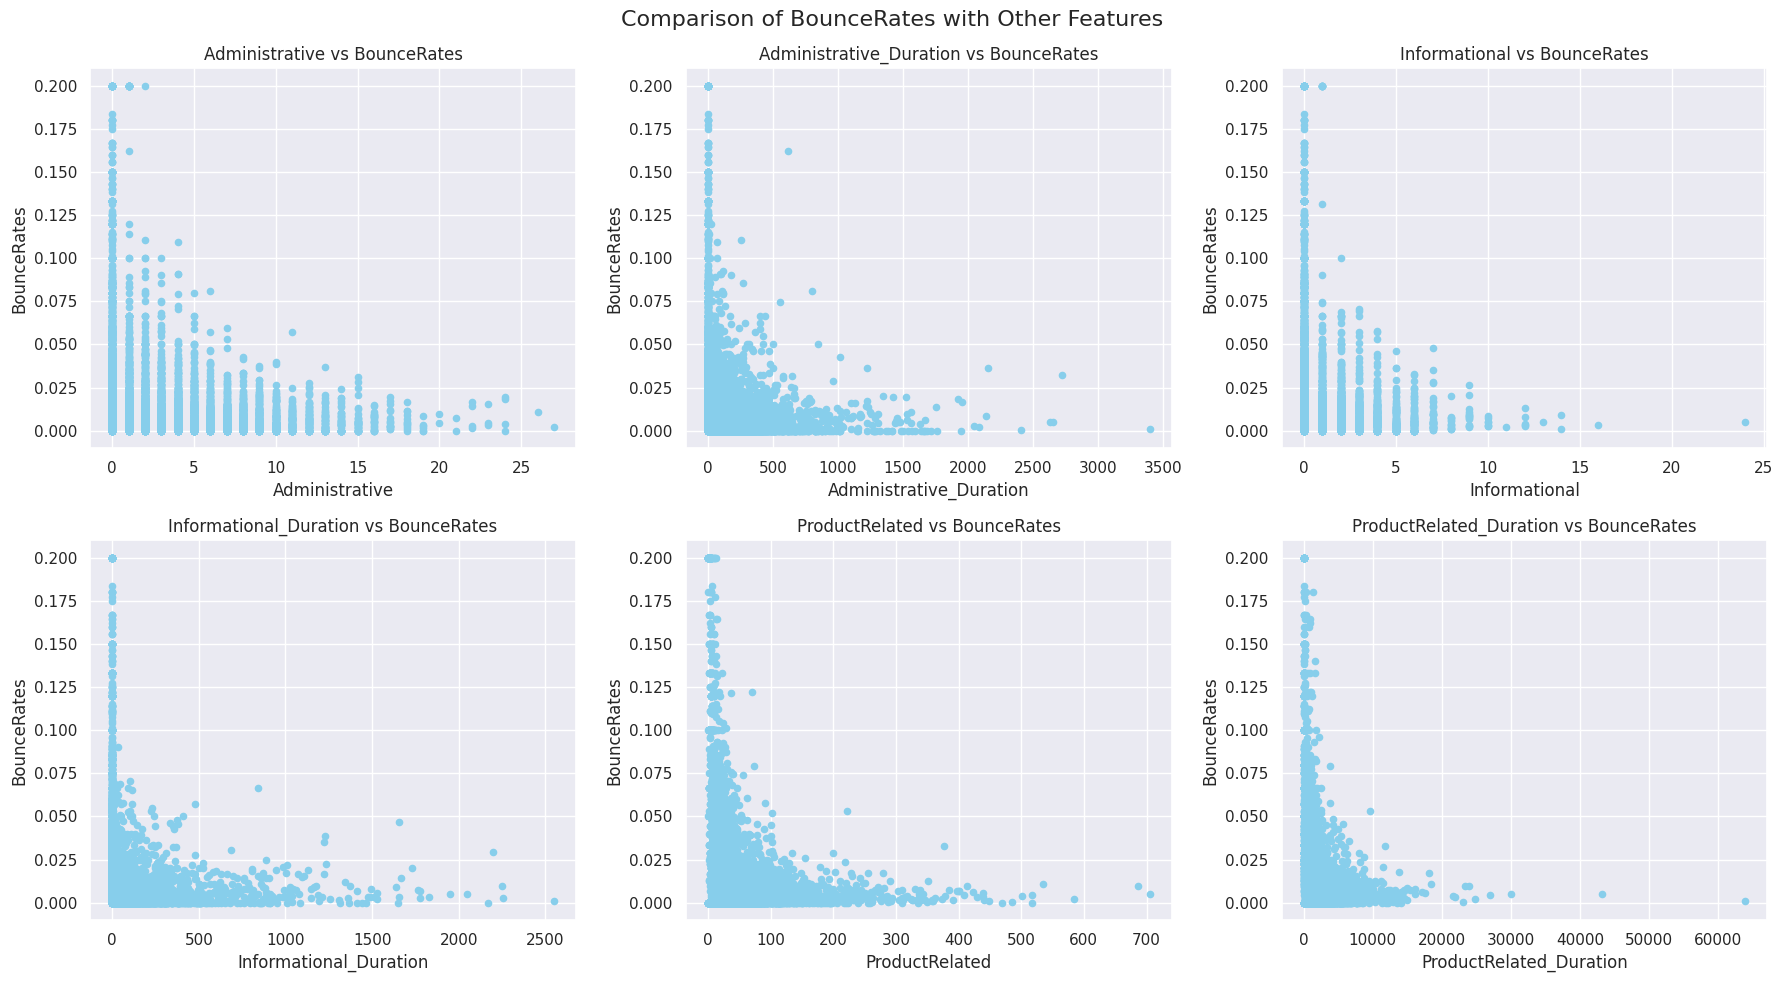

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame
features_to_compare = [
    'Administrative', 
    'Administrative_Duration', 
    'Informational', 
    'Informational_Duration', 
    'ProductRelated', 
    'ProductRelated_Duration'
]

selected_feature = 'BounceRates'

# New DataFrame with the selected feature and others for comparison
selected_df = df[features_to_compare + [selected_feature]]

# Plot bar charts for each feature against 'BounceRates'
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle(f'Comparison of {selected_feature} with Other Features', fontsize=16)

for i, feature in enumerate(features_to_compare):
    row, col = divmod(i, 3)
    selected_df.plot(kind='scatter', x=feature, y=selected_feature, ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f'{feature} vs {selected_feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel(selected_feature)

plt.tight_layout()
plt.show()

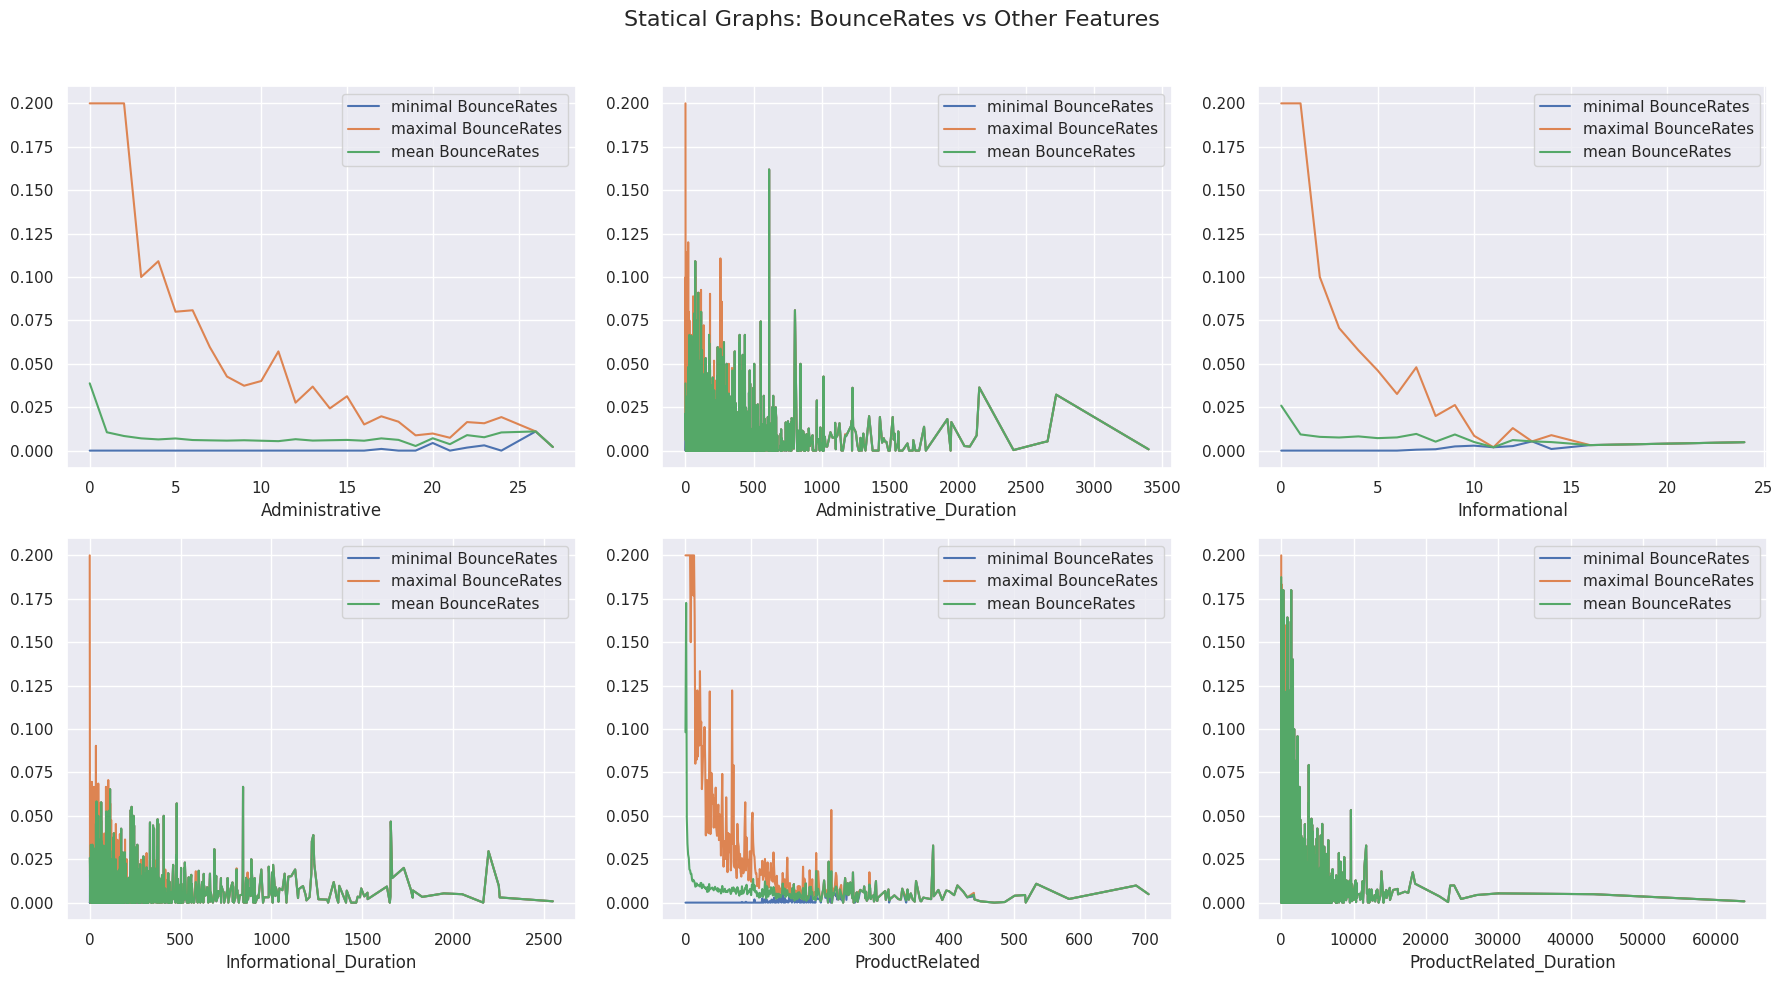

In [7]:
import pandas as pd

# DataFrame
features_to_compare = [
    'Administrative', 
    'Administrative_Duration', 
    'Informational', 
    'Informational_Duration', 
    'ProductRelated', 
    'ProductRelated_Duration'
]

selected_feature = 'BounceRates'

# New DataFrame with the selected feature and others for comparison
selected_df = df[features_to_compare + [selected_feature]]

# Separate figure for similar graphs for each feature
fig, axes_similar = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle(f'Statical Graphs: {selected_feature} vs Other Features', fontsize=16)

for i, feature in enumerate(features_to_compare):
    row, col = divmod(i, 3)

    # Graph for each feature
    ExitRates_to_Feature = pd.DataFrame(
        df, columns=[feature, selected_feature])
    ExitRates_to_Feature[feature] = ExitRates_to_Feature[feature].round(
        decimals=3)
    pd.concat([
        ExitRates_to_Feature.groupby(feature).min().rename(
            columns={selected_feature: f'minimal {selected_feature}'}),
        ExitRates_to_Feature.groupby(feature).max().rename(
            columns={selected_feature: f'maximal {selected_feature}'}),
        ExitRates_to_Feature.groupby(feature).mean().rename(
            columns={selected_feature: f'mean {selected_feature}'}),
    ], axis=1,).plot(ax=axes_similar[row, col])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Exit Rates Compared to Features

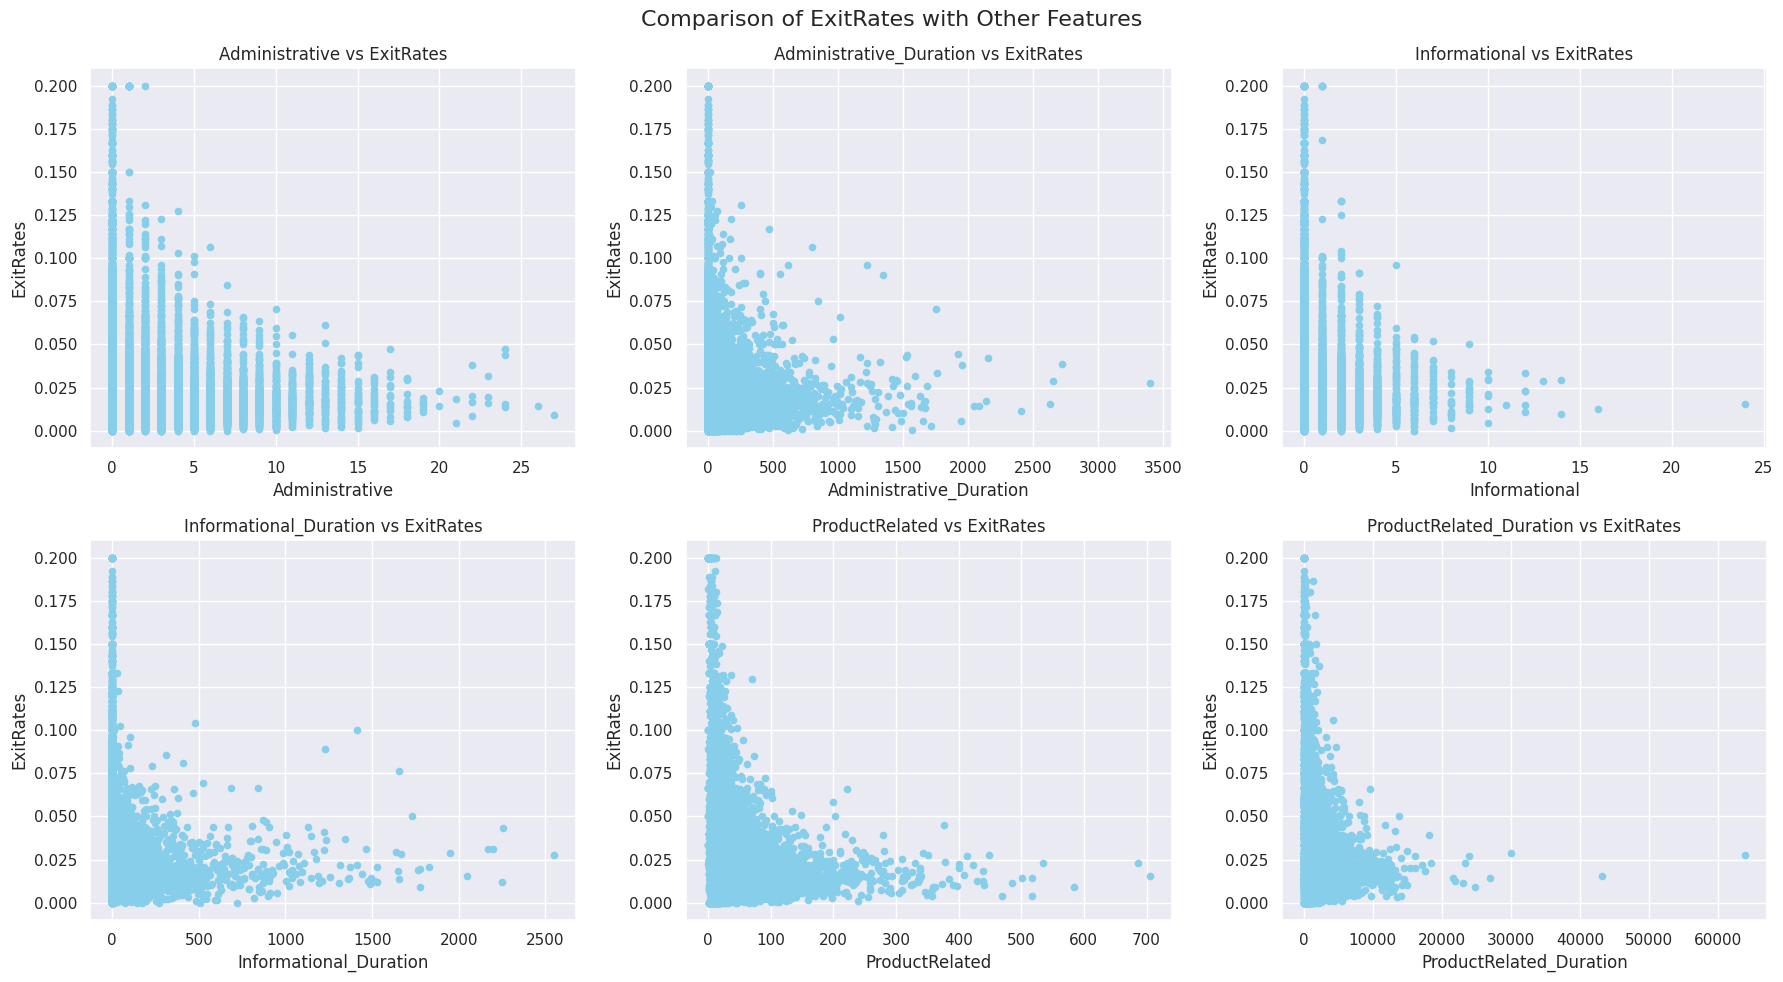

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame
features_to_compare = [
    'Administrative', 
    'Administrative_Duration', 
    'Informational', 
    'Informational_Duration', 
    'ProductRelated', 
    'ProductRelated_Duration'
]

selected_feature = 'ExitRates'

# New DataFrame with the selected feature and others for comparison
selected_df = df[features_to_compare + [selected_feature]]

# Plot bar charts for each feature against 'ExitRates'
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle(f'Comparison of {selected_feature} with Other Features', fontsize=16)

for i, feature in enumerate(features_to_compare):
    row, col = divmod(i, 3)
    selected_df.plot(kind='scatter', x=feature, y=selected_feature, ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f'{feature} vs {selected_feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel(selected_feature)

plt.tight_layout()
plt.show()

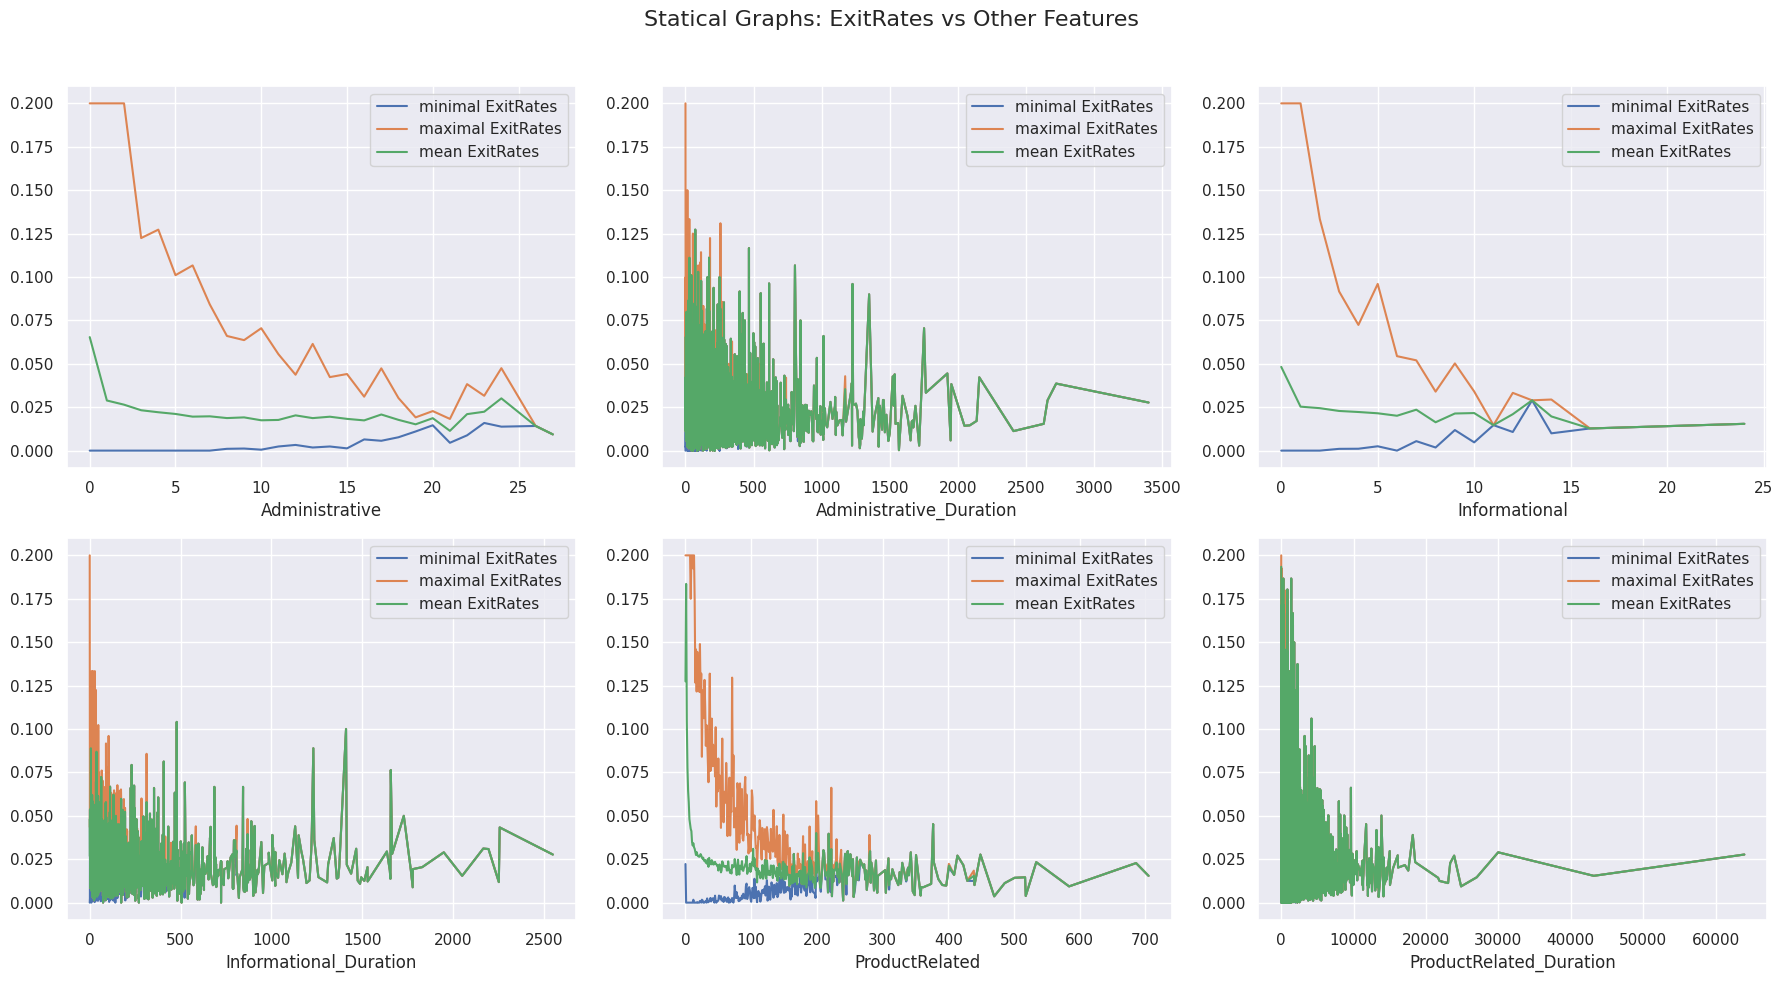

In [9]:
import pandas as pd

# DataFrame
features_to_compare = [
    'Administrative', 
    'Administrative_Duration', 
    'Informational', 
    'Informational_Duration', 
    'ProductRelated', 
    'ProductRelated_Duration'
]

selected_feature = 'ExitRates'

# New DataFrame with the selected feature and others for comparison
selected_df = df[features_to_compare + [selected_feature]]

# Separate figure for similar graphs for each feature
fig, axes_similar = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle(f'Statical Graphs: {selected_feature} vs Other Features', fontsize=16)

for i, feature in enumerate(features_to_compare):
    row, col = divmod(i, 3)

    # Graph for each feature
    ExitRates_to_Feature = pd.DataFrame(
        df, columns=[feature, selected_feature])
    ExitRates_to_Feature[feature] = ExitRates_to_Feature[feature].round(
        decimals=3)
    pd.concat([
        ExitRates_to_Feature.groupby(feature).min().rename(
            columns={selected_feature: f'minimal {selected_feature}'}),
        ExitRates_to_Feature.groupby(feature).max().rename(
            columns={selected_feature: f'maximal {selected_feature}'}),
        ExitRates_to_Feature.groupby(feature).mean().rename(
            columns={selected_feature: f'mean {selected_feature}'}),
    ], axis=1,).plot(ax=axes_similar[row, col])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Page Value Compared to All Features

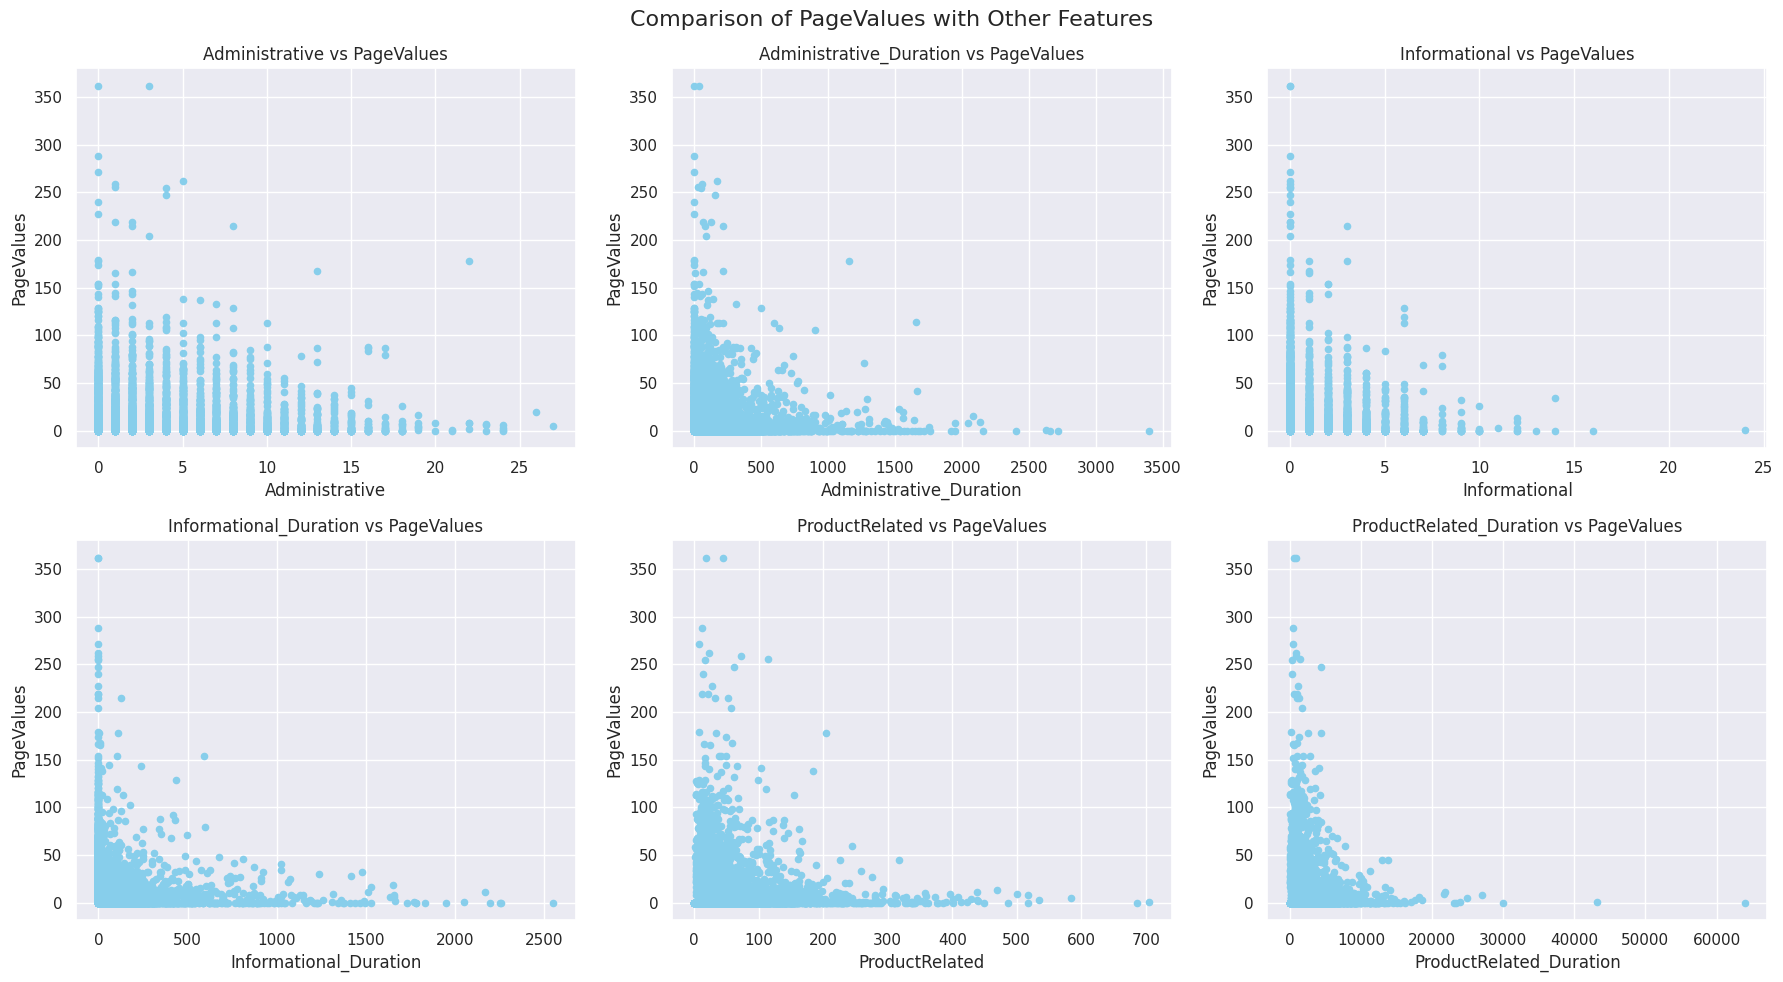

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame
features_to_compare = [
    'Administrative', 
    'Administrative_Duration', 
    'Informational', 
    'Informational_Duration', 
    'ProductRelated', 
    'ProductRelated_Duration'
]

selected_feature = 'PageValues'

# New DataFrame with the selected feature and others for comparison
selected_df = df[features_to_compare + [selected_feature]]

# Plot bar charts for each feature against 'PageValues'
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle(f'Comparison of {selected_feature} with Other Features', fontsize=16)

for i, feature in enumerate(features_to_compare):
    row, col = divmod(i, 3)
    selected_df.plot(kind='scatter', x=feature, y=selected_feature, ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f'{feature} vs {selected_feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel(selected_feature)

plt.tight_layout()
plt.show()

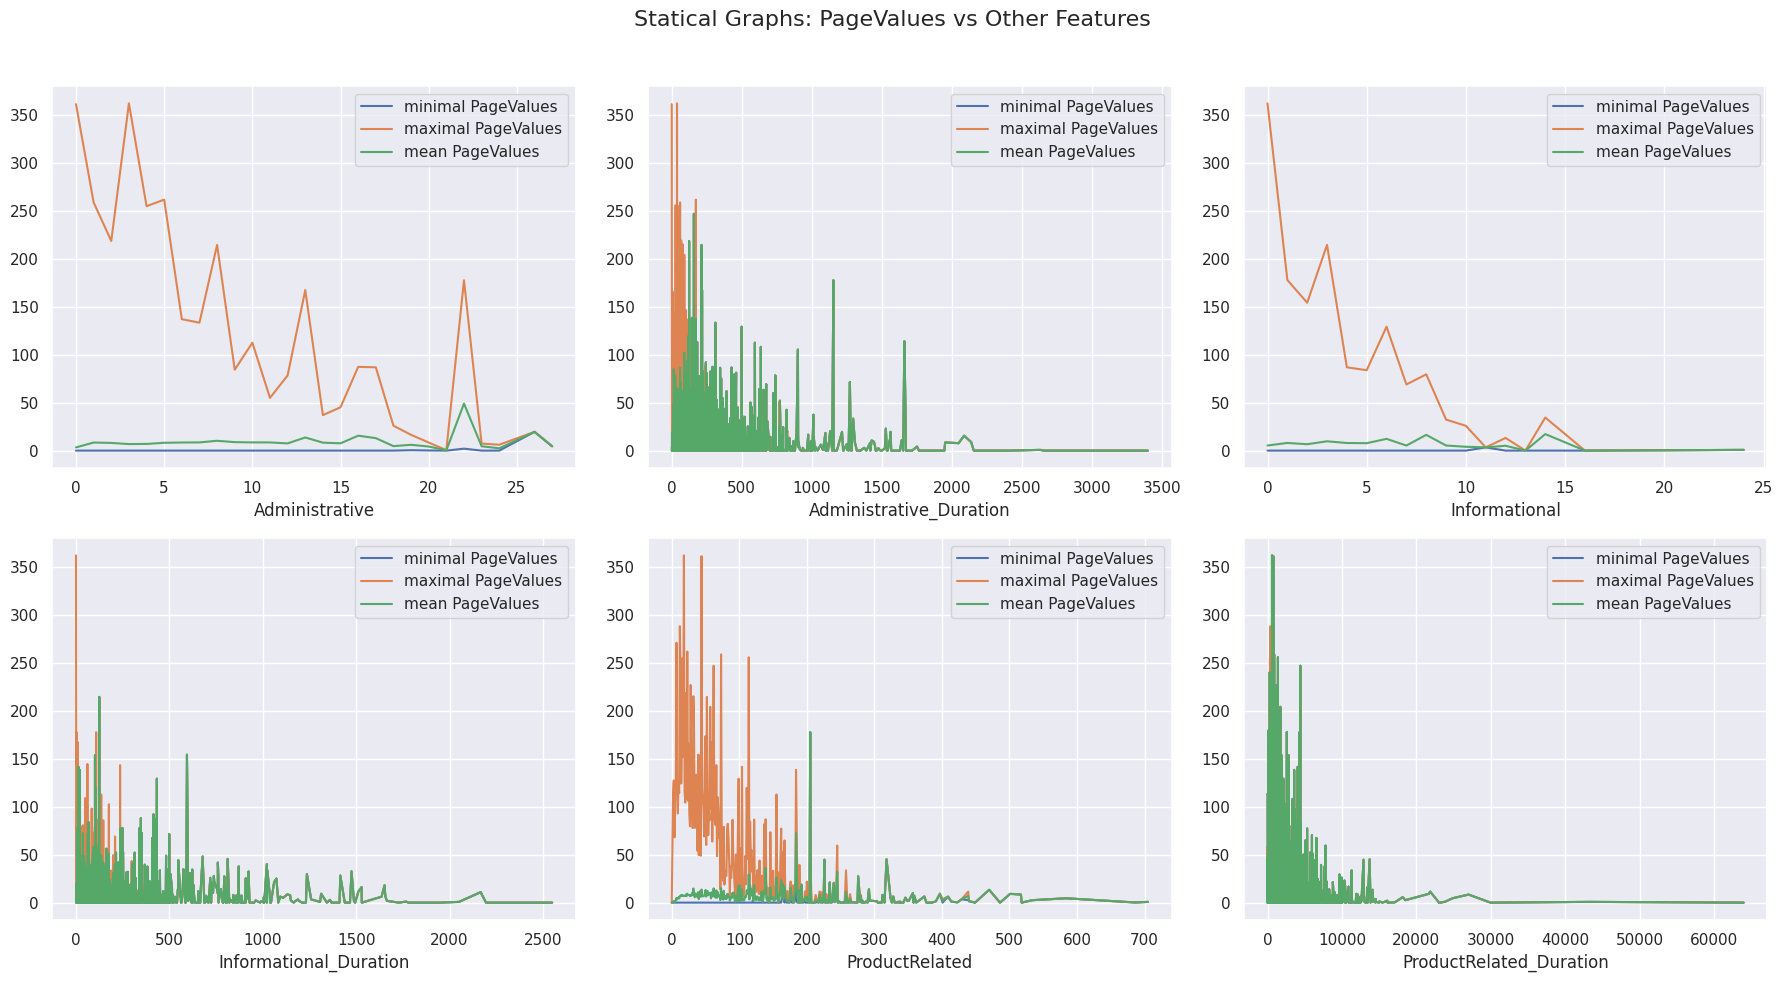

In [11]:
import pandas as pd

# DataFrame
features_to_compare = [
    'Administrative', 
    'Administrative_Duration', 
    'Informational', 
    'Informational_Duration', 
    'ProductRelated', 
    'ProductRelated_Duration'
]

selected_feature = 'PageValues'

# New DataFrame with the selected feature and others for comparison
selected_df = df[features_to_compare + [selected_feature]]

# Separate figure for similar graphs for each feature
fig, axes_similar = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle(f'Statical Graphs: {selected_feature} vs Other Features', fontsize=16)

for i, feature in enumerate(features_to_compare):
    row, col = divmod(i, 3)

    # Graph for each feature
    ExitRates_to_Feature = pd.DataFrame(
        df, columns=[feature, selected_feature])
    ExitRates_to_Feature[feature] = ExitRates_to_Feature[feature].round(
        decimals=3)
    pd.concat([
        ExitRates_to_Feature.groupby(feature).min().rename(
            columns={selected_feature: f'minimal {selected_feature}'}),
        ExitRates_to_Feature.groupby(feature).max().rename(
            columns={selected_feature: f'maximal {selected_feature}'}),
        ExitRates_to_Feature.groupby(feature).mean().rename(
            columns={selected_feature: f'mean {selected_feature}'}),
    ], axis=1,).plot(ax=axes_similar[row, col])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()